# <b> DEEP LEARNING – 2018.1 </b>
## ANÁLISE E INTERPRETAÇÃO DE RESULTADOS (TESTE 03 – DL04)
<b>20180057876</b> - JOSÉ HENRIQUE TARGINO DIAS GÓIS <br>
<b>20170065794</b> - PAULO JOSÉ PEREIRA JÚNIOR <br>

## 1. Construa uma função que faça a convolução de dois vetores: a = [1 2 3 4 5]’ e b = [1 2 3].

In [5]:
def convolucao1d(A,B):
    if len(A)<len(B):
        B,A=A,B
    ia     = [0]
    jb     = [0]
    result = []
    for c in range(len(A)+len(B)-1):
        dotprod = 0
        for (i,j) in zip(ia,jb):
            dotprod = dotprod + A[i]*B[j]
        result.append(dotprod)
        if c<len(B)-1:
            ia.append(ia[-1]+1)
            jb.insert(0,jb[0]+1)
        elif c<len(A)-1:
            ia = [a+1 for a in ia]
        else:
            ia.pop(0)
            jb.pop(len(jb)-1)
    
    return result

### ➢ Aplique a função sobre os dois vetores, faça a operação (a, b) e (b, a), mostre e analise seus resultados..

In [8]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([1,2,3,4,5])
B = np.array([1,2,3])

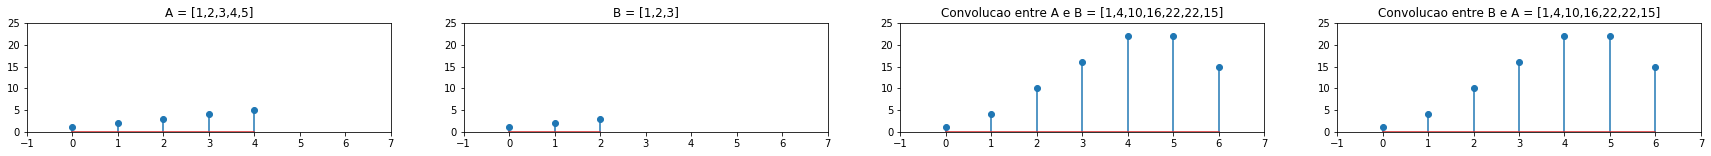

In [9]:
plt.figure(figsize=(30,2))

plt.subplot(141);plt.stem(A); plt.title('A = ['+','.join([str(x) for x in A])+']'); plt.xlim((-1,7)); plt.ylim((0,25));
plt.subplot(142);plt.stem(B); plt.title('B = ['+','.join([str(x) for x in B])+']'); plt.xlim((-1,7)); plt.ylim((0,25));
plt.subplot(143);plt.stem(convolucao1d(A,B)); 
plt.title('Convolucao entre A e B = ['+','.join([str(x) for x in convolucao1d(A,B)])+']'); 
plt.xlim((-1,7)); plt.ylim((0,25));
plt.subplot(144);plt.stem(convolucao1d(B,A)); 
plt.title('Convolucao entre B e A = ['+','.join([str(x) for x in convolucao1d(B,A)])+']');
plt.xlim((-1,7)); plt.ylim((0,25));

Com a implementação que eu realizei não há diferenças, o que implica que ela é comutativa no domínio real.

### ➢ Compare com a resposta dada pela função conv() do MatLab ou a mesma função em outra biblioteca.

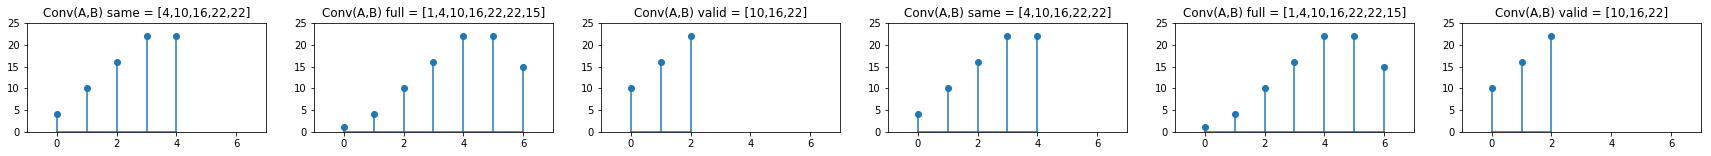

In [10]:
plt.figure(figsize=(30,2))

conv_mode = ['same','full','valid']
conv_in   = [(A,B),(B,A)]
cont      = 0
for iA,iB in conv_in:
    for mode in conv_mode:
        cont = cont + 1
        plt.subplot(1,6,cont);
        plt.stem(np.convolve(iA,iB,mode=mode));
        plt.title('Conv(A,B) '+mode+' = ['+','.join([str(x) for x in np.convolve(iA,iB,mode=mode)])+']'); 
        plt.xlim((-1,7)); plt.ylim((0,25));
        

In [11]:
erroAB = np.mean((convolucao1d(A,B)-np.convolve(A,B,mode='full'))**2)
erroBA = np.mean((convolucao1d(B,A)-np.convolve(B,A,mode='full'))**2)
print('A diferença entre o caseiro vs. o da biblioteca foi de ',erroAB,' e ',erroBA,'.')

A diferença entre o caseiro vs. o da biblioteca foi de  0.0  e  0.0 .


Minha implementação da convolução possui resultado identico a função convolução no modo "full". As respostas do modo same e do modo válido é uma fatia da resposta do modo completo.

## 2. Construa uma função que faça a convolução bidimensional.

In [12]:
import numpy as np;
def convolucao2d(entrada,kernel):
    import numpy as np;
    saida   = np.zeros(entrada.shape)
    k       = np.int(kernel.shape[0]/2)

    for i in range(entrada.shape[0]):
        for j in range(entrada.shape[1]):
            soma = 0
            for ii in range(-k,k+1):
                for jj in range(-k,k+1):
                    if ((i+ii)>=0) & ((i+ii)<entrada.shape[0]) & ((j+jj)>=0) & ((j+jj)<entrada.shape[1]):
                        soma = soma + entrada[i+ii,j+jj]*kernel[k-ii,k-jj]
                        
            saida[i,j] = soma
    return saida
    

### ➢ Aplique a função sobre as duas matrizes a seguir, fazendo novamente (A, B) e (B, A) mostre e analise os resultados obtidos.

$
\text{A} = 
\begin{bmatrix}
    8 & 5 & 8 & 1 & 6 & 8 & 7 \\
    9 & 9 & 2 & 8 & 2 & 7 & 8 \\
    2 & 9 & 4 & 9 & 7 & 3 & 2 \\
    9 & 2 & 9 & 7 & 1 & 9 & 5 \\
    6 & 9 & 8 & 7 & 3 & 1 & 5 \\
    1 & 9 & 9 & 7 & 1 & 4 & 6 \\
    3 & 5 & 6 & 4 & 1 & 4 & 7 \\
\end{bmatrix},
\text{B} = 
\begin{bmatrix}
    3 & 2 & 2 \\
    1 & 1 & 3 \\
    3 & 1 & 2 \\
\end{bmatrix}
$

In [13]:
A = np.array([[8,5,8,1,6,8,7],[9,9,2,8,2,7,8],[2,9,4,9,7,3,2],[9,2,9,7,1,9,5],[6,9,8,7,3,1,5],[1,9,9,7,1,4,7],[3,6,7,4,1,4,7]])
B = np.array([[3,2,2],[1,1,3],[3,1,2]])

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

def mdisp(A,title='',sp=(1,1,1),cl=(0,10)):
    ax = plt.subplot(sp[0],sp[1],sp[2]); 
    im = plt.imshow(A);
    plt.title(title);

    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im, cax=cax)

    plt.clim(cl);




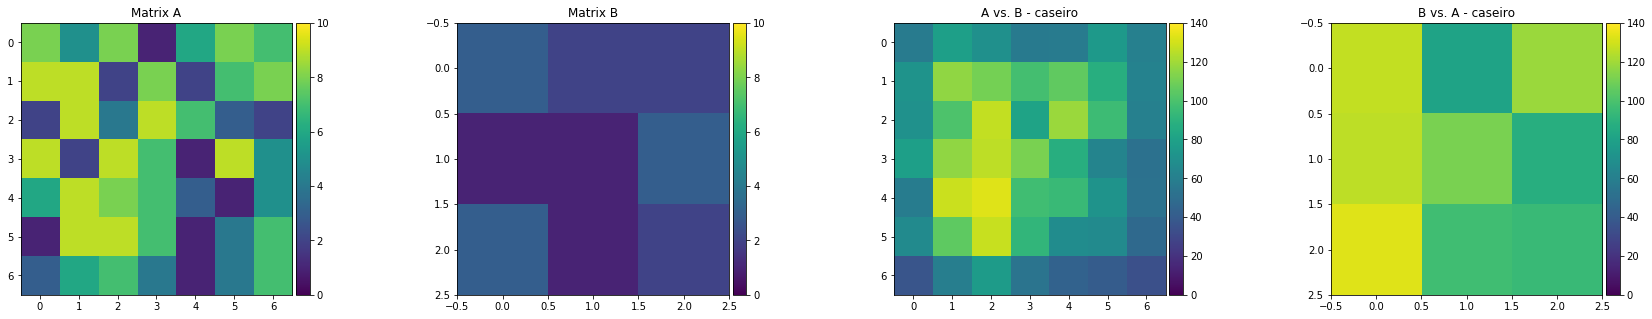

In [18]:
plt.figure(figsize=(30,5));

mdisp(A                , 'Matrix A'         , (1,4,1), (0,10))
mdisp(B                , 'Matrix B'         , (1,4,2), (0,10))
mdisp(convolucao2d(A,B), 'A vs. B - caseiro', (1,4,3), (0,140))
mdisp(convolucao2d(B,A), 'B vs. A - caseiro', (1,4,4), (0,140))


## ➢ Compare com a função conv2() do MatLab ou de qualquer outra biblioteca.

## ➢ Avalie e explique os resultados obtidos quando, no MatLab, você usa o argumento ‘same’ aplicado a (A, B) e (B, A).

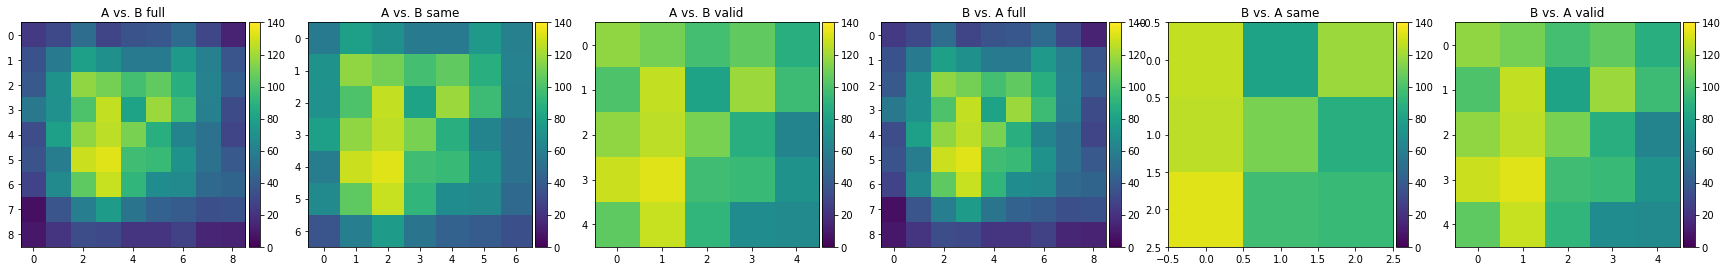

In [19]:
from scipy.signal import convolve2d
plt.figure(figsize=(30,8));
cont = 0
for iA,iB,ABtit in [(A,B,'A vs. B'),(B,A,'B vs. A')]:
    for mode in ['full','same','valid']:
        cont    = cont+1;
        mdisp(convolve2d(iA,iB,mode=mode) , ABtit+' '+mode ,(1,6,cont),(0,140))

In [20]:
erroAB = np.mean((convolucao2d(A,B)-convolve2d(A,B,mode='same'))**2)
erroBA = np.mean((convolucao2d(B,A)-convolve2d(B,A,mode='same'))**2)
print('A diferença entre o caseiro vs. o da biblioteca foi de ',erroAB,' e ',erroBA,'.')

A diferença entre o caseiro vs. o da biblioteca foi de  0.0  e  0.0 .


A implementação foi satisfatória para a resolução do problema, contudo estou ciente que ela só está válida para matrizes quadradas e de tamanho impar.

# Filtragem
## 3. Dada a imagem do arquivo DL04_img1: <br>
## ➢ Converta-a para níveis de cinza. <br>

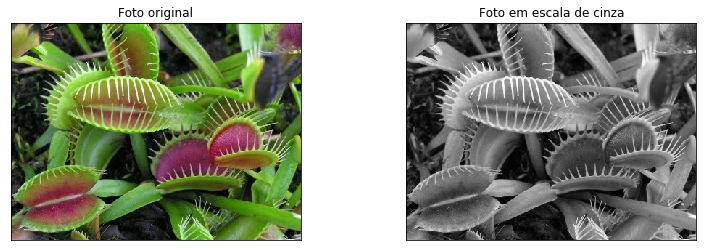

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import numpy as np
from skimage import io

def togray(X):
    return X[:,:,0]*0.2126 + X[:,:,1]*0.7152 + X[:,:,2]*0.0722 

planta      = plt.imread('DL04_Img1.jpg');
planta_img  = planta.copy()
planta_gray = togray(planta_img)

cm_gray     = plt.get_cmap('gray')

plt.figure(figsize=(13,4))
plt.subplot(1,2,1); plt.imshow(planta_img); plt.title("Foto original"); plt.xticks([]); plt.yticks([]);
plt.subplot(1,2,2); plt.imshow(planta_gray, cmap=cm_gray); plt.title("Foto em escala de cinza"); plt.xticks([]); plt.yticks([]);

## ➢ Aplique na imagem 03 filtros, um de cada vez, E avalie os resultados. Os filtros possuem respectivamente dimensões de 3 x 3; 7 x 7 e 11 x 11. Todos os valores são iguais a um dividido pelo quadrado da dimensão, isto é, 9; 49 e 121.

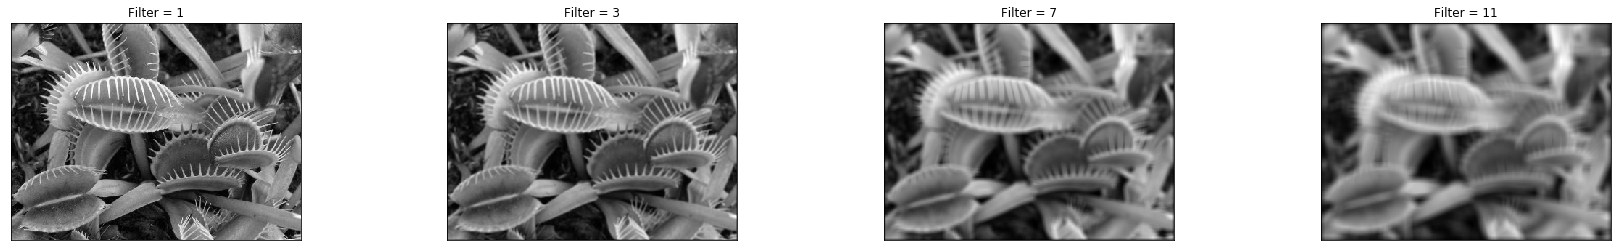

In [25]:
plt.figure(figsize=(30,4))

mask_size = [1,3,7,11]

for s,n in enumerate(mask_size):
    mask = np.ones((n,n))/n**2
    planta_filter = convolve2d(planta_gray,mask,'same')
    plt.subplot(1,len(mask_size),s+1); plt.imshow(planta_filter, cmap=cm_gray); plt.title('Filter = '+str(n)); plt.xticks([]); plt.yticks([]);

## ➢ Aplique agora o filtro de 11 x 11 na imagem original, em RGB.

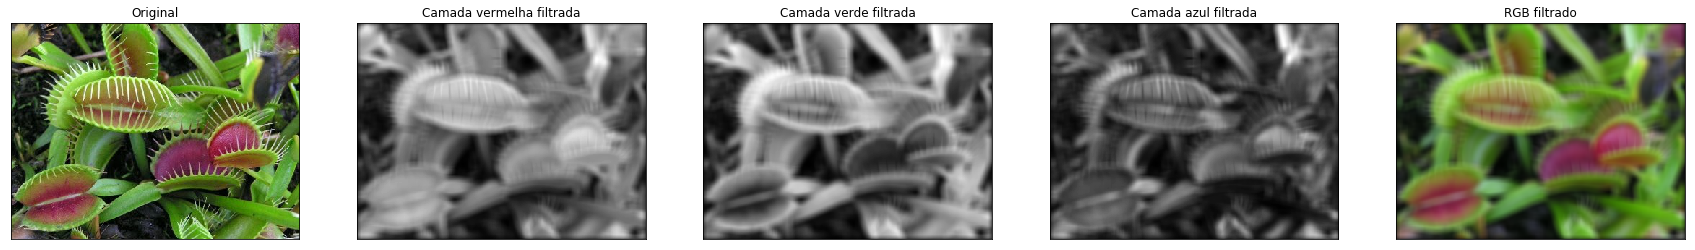

In [26]:
mask_size = [11]
plt.figure(figsize=(30,4))

plt.subplot(1,5,1); plt.imshow(planta_img); plt.title('Original'); plt.xticks([]); plt.yticks([]);
color_name = ['vermelha','verde','azul']
for s,n in enumerate(mask_size):
    planta_filter = planta_img.copy();
    mask          = np.ones((n,n))/n**2
    
    for l in range(planta_filter.shape[2]):
        planta_filter[:,:,l] = convolve2d(planta_img[:,:,l],mask,'same')
        plt.subplot(1,5,l+2); plt.imshow(planta_filter[:,:,l],cmap=plt.get_cmap('gray')); plt.title('Camada '+str(color_name[l])+ ' filtrada'); plt.xticks([]); plt.yticks([]);

plt.subplot(1,5,5); plt.imshow(planta_filter); plt.title('RGB filtrado'); plt.xticks([]); plt.yticks([]);


## 4. Dadas as imagens dos arquivos DL04_img2(1) e DL04_img2(2)
## ➢ Verifique com qual dos tipos de filtro: média e mediana, você consegue restaurar a imagem em (2) para melhor se aproximar da (1). Avalie o desempenho alcançado usando o MSE.

In [27]:
clean_img = '/home/zetdg/notebook/BTI/Deep/E03/DL04_Img2 (1).jpg'
dirty_img = '/home/zetdg/notebook/BTI/Deep/E03/DL04_Img2 (2).jpg'

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d,medfilt

clean = plt.imread(clean_img);
dirty = plt.imread(dirty_img);

print("Clean shape = ",clean.shape,"\nDirty shape = ",dirty.shape)

Clean shape =  (210, 273, 3) 
Dirty shape =  (217, 288, 3)


Por algum motivo a foto veio com tamanhos diferentes, calculei qual era o deslocamento que minimizava a diferença entre as duas fotos e criei uma nova foto suja.

In [28]:
erro = math.inf

for j in range(10):
    for i in range(8):
        err = clean-dirty[i+0:210+i,j+0:273+j,:]
        if (np.mean(err.flatten()) < erro):
            new_dirty = dirty[i+0:210+i,j+0:273+j,:]

dirty = new_dirty
del new_dirty

print("Clean shape = ",clean.shape,"\nDirty shape = ",dirty.shape)

Clean shape =  (210, 273, 3) 
Dirty shape =  (210, 273, 3)


In [31]:
def idisp(image,titulo='',sp=(1,1,1)):
    plt.subplot(sp[0],sp[1],sp[2]);
    plt.imshow(image) ;
    plt.title(titulo);
    plt.xticks([]);
    plt.yticks([]);


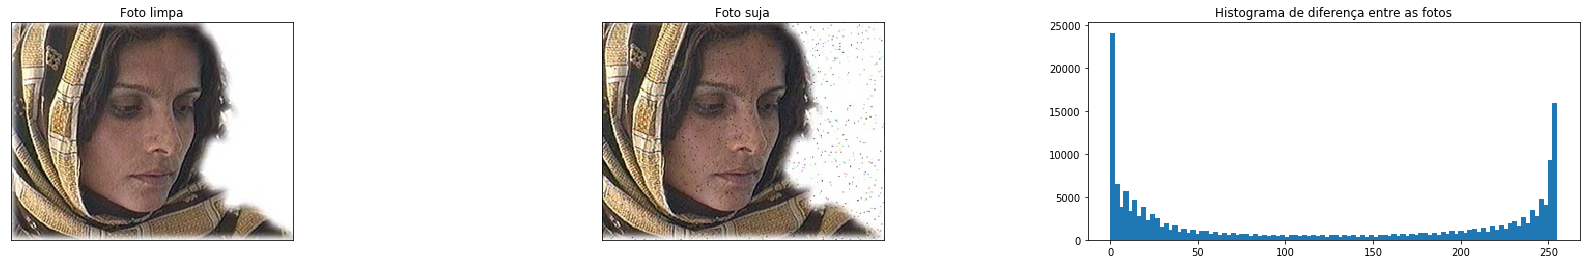

In [34]:
plt.figure(figsize=(30,4))
dirty_error = dirty.flatten()-clean.flatten()
val,bins = np.histogram(dirty_error,bins=100)
bins = (bins[:-1:1]+bins[1::1])/2
#plt.subplot(1,3,1); plt.imshow(clean) ; plt.title('Foto limpa'); plt.xticks([]); plt.yticks([]);
#plt.subplot(1,3,2); plt.imshow(dirty) ; plt.title('Foto suja'); plt.xticks([]); plt.yticks([]);
idisp(clean, 'Foto limpa', (1,3,1))
idisp(dirty, 'Foto suja' , (1,3,2))
plt.subplot(1,3,3); plt.bar(bins,val,3,) ; plt.title('Histograma de diferença entre as fotos');

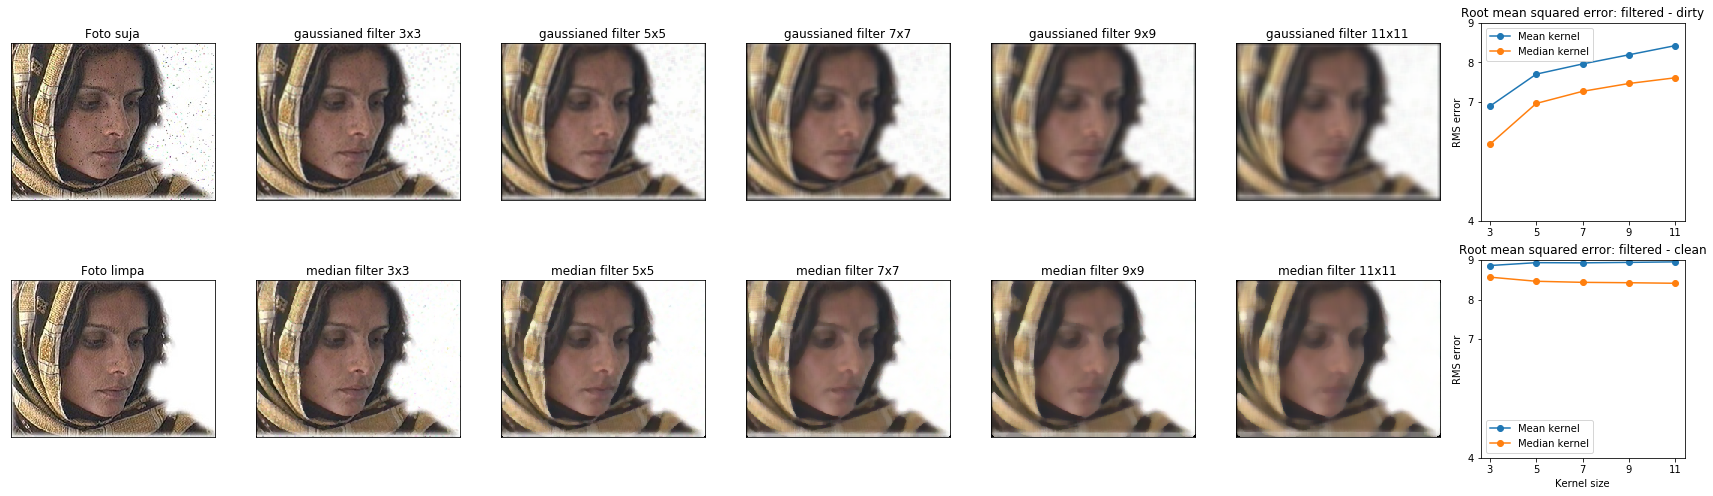

In [65]:
sme = lambda a, b : np.sqrt(np.mean((a.flatten()-b.flatten())**2))

%matplotlib inline
mask_size = [3,5,7,9,11]

plt.figure(figsize=(30,8))

idisp(dirty,'Foto suja',(2,7,1))
idisp(clean,'Foto limpa',(2,7,8))

df_erro = {'clean_sme_mean':[],'clean_sme_median':[],'dirty_sme_mean':[],'dirty_sme_median':[],'size':[]}

for s,n in enumerate(mask_size):
    dirty_mean_filter   = dirty.copy();
    dirty_median_filter = dirty.copy();
    mask                = np.ones((n,n))/n**2

    for l in range(dirty_mean_filter.shape[2]):
        dirty_mean_filter[:,:,l]   = convolve2d(dirty[:,:,l],mask,'same')
        dirty_median_filter[:,:,l] =    medfilt(dirty[:,:,l],n)
        
    idisp(dirty_mean_filter,   'gaussianed filter {}x{}'.format(n,n) , (2,7,s+2))
    idisp(dirty_median_filter, 'median filter {}x{}'.format(n,n)     , (2,7,s+9))
    
    df_erro['clean_sme_median'].append(sme(clean,dirty_median_filter)),df_erro['clean_sme_mean'].append(sme(clean,dirty_mean_filter))
    df_erro['dirty_sme_median'].append(sme(dirty,dirty_median_filter)),df_erro['dirty_sme_mean'].append(sme(dirty,dirty_mean_filter))
    df_erro['size'].append(n)

plt.subplot(2,7,7);plt.plot(df_erro['size'],df_erro['dirty_sme_mean'],'o-');plt.plot(df_erro['size'],df_erro['dirty_sme_median'],'o-');plt.ylim((4,9));plt.yticks((4,7,8,9));
plt.title('Root mean squared error: filtered - dirty');plt.ylabel('RMS error');plt.xticks((3,5,7,9,11));plt.legend(['Mean kernel','Median kernel']);

plt.subplot(2,7,14);plt.plot(df_erro['size'],df_erro['clean_sme_mean'],'o-');plt.plot(df_erro['size'],df_erro['clean_sme_median'],'o-');plt.ylim((4,9));plt.yticks((4,7,8,9));
plt.title('Root mean squared error: filtered - clean');plt.xlabel('Kernel size');plt.ylabel('RMS error');plt.xticks((3,5,7,9,11));plt.legend(['Mean kernel','Median kernel']);

# Detector de Bordas


## ➢ Detecte e mostre as fronteiras que separam os diferentes estados

Para detectar as fronteiras que delimitar o brasil junto com as que separam os diferentes estados eu utilizei o filtro Canny.

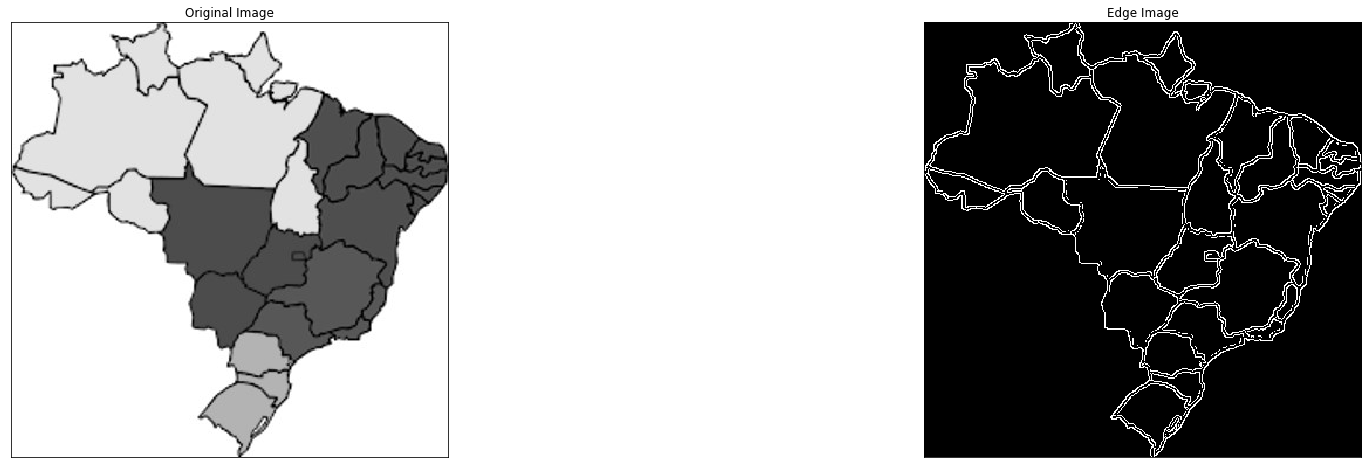

In [67]:
%matplotlib inline
import cv2
import numpy as np
from skimage import measure
from scipy.signal import convolve2d
from matplotlib import pyplot as plt

br_path = '/home/zetdg/notebook/BTI/Deep/E03/DL04_Img3.jpg'

img     = cv2.imread(br_path,0)
#
edges   = cv2.Canny(img,100,200)

plt.figure(figsize=(30,8))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# ➢ Projete uma forma de segmentar e mostrar isoladamente cada região do Brasil. Calcule, aproximadamente – não sei se o mapa está em escala, a área percentualmente ocupada por cada região.

Para segmentar isoladamente cada região do Brasil eu utilizei o método K-means por termos as cores como um critério de agrupamento. Como pre-processamento eu apliquei um filtro de mediana com tamanho 13. Como a quantidade de clusters de meu interesse era preconcebida, 5 regiões, o branco do fundo e as bordas eu usei k=7 para o KMeans.

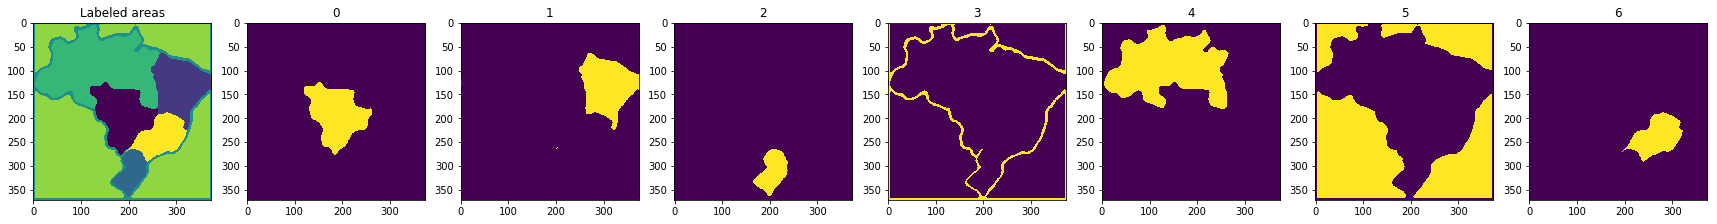

In [89]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def convolve3d(img,mask,mode='same'):
    result = img.copy()   
    if len(result.shape)>2:
        for l in range(result.shape[2]):
            result[:,:,l] = convolve2d(result[:,:,l],mask,'same')
        return result
    else:
        return convolve2d(result,mask,'same')

brasil = cv.imread('DL04_Img3.jpg')
n      = 13
mask   = np.ones((n,n))/n**2
brasil = convolve3d(brasil,mask,'same')

k_input           = np.float32(brasil.reshape((-1,3)))
criteria          = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k_cluster         = 7
ret,klabel,center = cv.kmeans(k_input,k_cluster,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

labeled_map       = klabel.reshape((brasil.shape[:2]))

plt.figure(figsize=(30,10))

plt.subplot(1,8,1)
plt.imshow(labeled_map)
plt.title('Labeled areas')

for s in range(np.max(labeled_map)+1):
    plt.subplot(1,8,2+s)
    plt.imshow(labeled_map==s)
    plt.title(s)


In [90]:
regiao_nome      = ["Norte","Nordeste","Sul","Sudeste","CentroOeste"]
#regiao_label     = [6,5,4,0,3]
regiao_label     = [4,1,2,6,0]
regiao_area      = np.array([np.sum(labeled_map==label) for label in regiao_label]) 
brasil_area      = np.sum(regiao_area)
regiao_pctg      = 100*regiao_area/brasil_area
regiao_pctg_wiki = {"Norte":45.2,"Nordeste":18.2,"Sul":6.8,"Sudeste":10.9,"CentroOeste":18.86}


In [91]:
for r in range(len(regiao_nome)):
    print('{}'.format(regiao_nome[r]))
    print('\tReal\t = {:.2f}%'.format(regiao_pctg_wiki[regiao_nome[r]],regiao_pctg[r]))
    print('\tEstimado = {:.2f}%'.format(regiao_pctg[r]))

Norte
	Real	 = 45.20%
	Estimado = 44.33%
Nordeste
	Real	 = 18.20%
	Estimado = 18.91%
Sul
	Real	 = 6.80%
	Estimado = 6.58%
Sudeste
	Real	 = 10.90%
	Estimado = 11.15%
CentroOeste
	Real	 = 18.86%
	Estimado = 19.04%


Desta maneira verificamos que a aproximação foi aceitável tendo em vista a simplicidade do método e a utilização de um mapa não oficial.